# 作業二：MLB 資料視覺化

## 作業要求：
* 使用提供的 .ipynb 模板
* 計算所有大聯盟球員的平均得分（Runs）將球員分為「高得分」與「低得分」兩組
* 將兩組球員的 *得分指標（如下）* 全部相加 畫出這兩組的 correlation matrix
* 解釋你對結果的看法

## 得分指標
* 得分（Runs Scored, R）
* 打點（Runs Batted In, RBI）
* 安打數（Hits, H）
* 全壘打數（Home Runs, HR）
* 打擊率（Batting Average, AVG）
* 上壘率（On-Base Percentage, OBP）
* 長打率（Slugging Percentage, SLG）
* 盜壘數（Stolen Bases, SB）
* 打數（At Bats, AB）
* 四壞球率（Walks, BB）
* 被三振數（Strikeouts, K）


## 引入套件
這份作業會使用：
* [pandas](https://pandas.pydata.org/)
* [seaborn](https://seaborn.pydata.org/)
* [matplotlib](https://matplotlib.org/)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 讀取檔案
使用 pandas 讀入 csv 檔，成為 dataframe

In [13]:

mlb_df = pd.read_csv("scrapy_workshop/workshop/mlb_player_stats.csv")

#check headers of the data
mlb_df

,AB,AVG,BB,G,H,HR,OBP,OPS,PLAYER,R,RBI,SB,SLG,SO,TEAM
0,8,0.625,0,2,5,1,0.625,1.750,Michael Harris,2,2,0,1.125,1,ATL
1,11,0.455,1,3,5,2,0.500,1.500,Jackson Chourio,3,3,1,1.000,1,MIL
2,26,0.423,3,7,11,4,0.500,1.500,Fernando Tatis,8,7,0,1.000,2,SD
3,7,0.429,0,2,3,1,0.429,1.429,Cedric Mullins,1,1,0,1.000,1,BAL
4,12,0.333,5,4,4,1,0.529,1.279,Bryce Harper,3,3,0,0.750,5,PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,9,0.000,0,3,0,0,0.100,0.100,Rhys Hoskins,0,1,0,0.000,3,MIL
112,8,0.000,0,2,0,0,0.000,0.000,Ramón Laureano,0,0,0,0.000,4,ATL
113,7,0.000,0,2,0,0,0.000,0.000,Ryan Mountcastle,0,0,0,0.000,4,BAL
114,11,0.000,0,3,0,0,0.000,0.000,Joey Ortiz,0,0,0,0.000,2,MIL


## 處理資料
在這步驟，我們要先計算所有球員的平均得分，從而將球員分成高得分組與低得分組

In [14]:
# TODO 3: 處理資料

# 計算所有球員 Runs 的平均值
R_mean = mlb_df['R'].mean()

# 將球員分成得分高於平和低於平均兩組
above_avg_df = mlb_df[mlb_df['R'] > R_mean]
below_avg_df = mlb_df[mlb_df['R'] <= R_mean]

## 資料視覺化
我們要分別對上面兩 dataframe 算出 [correlation matrix](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)，並使用 [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 為其視覺化

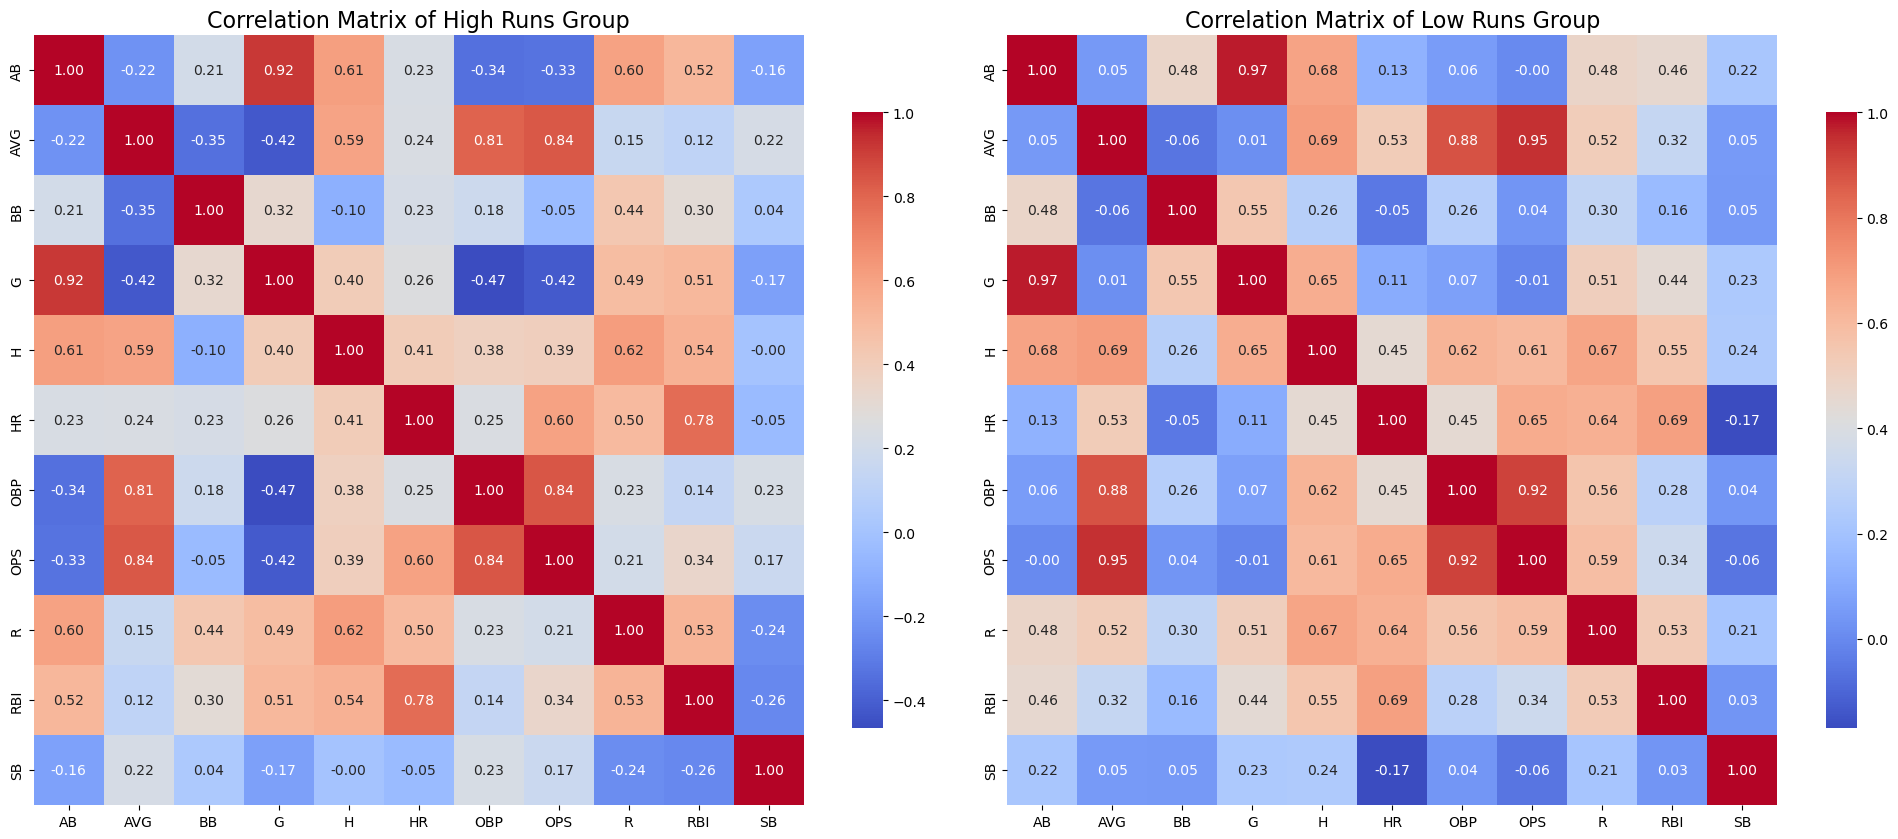

In [22]:
# TODO 4: 資料視覺化

# 要計算的欄位
numeric_cols = ['AB', 'AVG', 'BB', 'G', 'H', 'HR', 'OBP', 'OPS', 'R', 'RBI', 'SB']

# 計算 correlation matrix
above_avg_cor_matrix = above_avg_df[numeric_cols].corr()
below_avg_cor_matrix = below_avg_df[numeric_cols].corr()

# 請將兩張圖娉排顯示。左邊是高得分組的 heatmap，右邊是低得分組
plt.figure(figsize=(20, 8))

# plt.subplot()設定子圖位置
# 繪製高得分組的 heatmap
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.heatmap(above_avg_cor_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of High Runs Group', fontsize=16)

# 繪製低得分組的 heatmap
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.heatmap(below_avg_cor_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Low Runs Group', fontsize=16)

plt.tight_layout()
plt.show()

## 你的解讀
請回下列問題（直接將回答寫在這個 cell）

### Q1: 影響「高得分組」球員得分（Runs, R）較多的得分指標，和影響影響「低得分組」較多的指標一樣嗎？
High Runs Group: The correlation between runs (R) and several indicators such as G (Games), H (Hits), and HR (Home Runs) is relatively strong (0.62 to 0.78), indicating these factors are significant contributors to a player's scoring. For instance, G has a strong positive correlation with runs, suggesting that players who participate in more games tend to score more runs.

Low Runs Group: The correlations here are much weaker, with runs being influenced less strongly by similar indicators. For example, the correlation between runs (R) and H is 0.28, while the correlation with HR is just 0.45. This suggests that players in the low scoring group may not benefit as much from the same performance metrics as those in the high scoring group.

### Q2: 從這兩者的差距中，你觀察到了什麼、會如何解讀這樣的差距呢？（例如，你能說出影響球員是否會成為高得分球員的關鍵因素嗎？）
Impact of Games Played: The "High Runs Group" shows a strong correlation between the number of games played (G) and runs scored (R). This suggests that being on the field consistently allows players more opportunities to contribute to scoring, indicating that playing time is crucial for high-scoring performance.

Home Runs as a Key Indicator: Home runs (HR) have a notably strong correlation with runs in the high scoring group (0.78) compared to the lower group (0.45). This suggests that the ability to hit home runs is a significant differentiator for high-scoring players. In contrast, low-scoring players may rely on more diverse strategies to score, as they do not benefit from home runs to the same extent.

Lower Impact of On-base Skills: Indicators such as OBP (On-Base Percentage) and BB (Walks) show varying levels of correlation in the two groups, indicating that the high-scoring players might also be better at getting on base through hits or walks, leading to scoring more runs when there are opportunities.

Consistency vs. Opportunities: The high scoring players appear to be more consistent and have more opportunities to score runs, while the low-scoring players might be dependent on sporadic contributions from various indicators. This implies that factors such as teamwork, batting order, and overall team performance could influence individual scoring capabilities.


<br><br><br><br><br><br>
AB	At Bats	The number of times a player has been at bat, excluding walks, hit by pitches, and sacrifices.
<br><br>
AVG	Batting Average	The ratio of hits to at-bats (Hits ÷ At Bats).
<br><br>
BB	Walks or Base on Balls	The number of times a batter is awarded first base due to four balls (Walks).
<br><br>
H	Hits	The number of times a batter successfully reaches base without an error.
<br><br>
G	Games Played	Another abbreviation for the number of games a player has participated in.
<br><br>

HR	The number of times a player hits the ball out of the park in fair territory.
<br><br>
OBP	On-base Percentage	The ratio of a player's on-base occurrences (hits + walks + hit by pitches) to their total plate appearances.
<br><br>
OPS	 The sum of on-base percentage (OBP) and slugging percentage (SLG), measuring overall offensive performance.
<br><br>
R	Runs	The total number of runs scored by a player.
<br><br>
RBI	Runs Batted In	The number of runs a player drives in through their at-bats, typically from hits.
<br><br>
SB	Stolen Bases	The number of bases a player successfully steals.